In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

In [ ]:
data = pd.read_csv('/content/google.csv',date_parser=True)
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
4312,2021-10-05,2747.239990,2680.000000,2680.000000,2723.540039,1206300.0,2723.540039
4313,2021-10-06,2757.040039,2689.729980,2692.510010,2747.080078,988200.0,2747.080078
4314,2021-10-07,2803.089111,2771.260010,2777.260010,2783.709961,912500.0,2783.709961
4315,2021-10-08,2806.340088,2788.586914,2798.120117,2801.120117,946200.0,2801.120117
4316,2021-10-11,2815.272949,2776.129883,2796.000000,2776.949951,828700.0,2776.949951


In [ ]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [ ]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [ ]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[9.44784778e-04, 0.00000000e+00, 3.30297476e-04, 1.34907815e-04,
        5.43577158e-01],
       [2.98909905e-03, 1.88269070e-03, 7.42148188e-04, 3.39307571e-03,
        2.77885876e-01],
       [4.78092870e-03, 5.42828275e-03, 4.71386823e-03, 3.83867253e-03,
        2.22151352e-01],
       ...,
       [8.11970140e-01, 7.90196475e-01, 7.92197108e-01, 8.15799919e-01,
        2.54669035e-02],
       [8.21510648e-01, 8.20249255e-01, 8.18777193e-01, 8.10219301e-01,
        1.70461017e-02],
       [8.19172450e-01, 8.12332341e-01, 8.19874096e-01, 8.09012935e-01,
        1.79972283e-02]])

In [ ]:
data_training[0:10]

array([[9.44784778e-04, 0.00000000e+00, 3.30297476e-04, 1.34907815e-04,
        5.43577158e-01],
       [2.98909905e-03, 1.88269070e-03, 7.42148188e-04, 3.39307571e-03,
        2.77885876e-01],
       [4.78092870e-03, 5.42828275e-03, 4.71386823e-03, 3.83867253e-03,
        2.22151352e-01],
       [4.01532907e-03, 3.15578588e-03, 4.91367615e-03, 1.98679174e-03,
        1.85522815e-01],
       [2.54928663e-03, 3.28434091e-03, 2.35285583e-03, 2.44873979e-03,
        1.11764685e-01],
       [2.52892532e-03, 3.60779742e-03, 2.34877754e-03, 3.22955403e-03,
        8.62762390e-02],
       [2.80177125e-03, 4.03492745e-03, 3.63326599e-03, 2.51005925e-03,
        7.55253226e-02],
       [1.52712949e-03, 2.50886967e-03, 2.48334225e-03, 8.17608416e-04,
        6.31690501e-02],
       [8.02252484e-04, 2.57107505e-03, 1.26817530e-03, 9.64778870e-04,
        5.97735163e-02],
       [5.00899472e-04, 1.53849694e-03, 1.43128490e-03, 9.81136361e-05,
        1.11151736e-01]])

In [ ]:
X_train = []
y_train = []

In [ ]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(3557, 60, 5)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [ ]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            15840     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

In [ ]:
regressior.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
112/112 [==============================] - 32s 231ms/step - loss: 0.0109
Epoch 2/10
112/112 [==============================] - 26s 228ms/step - loss: 0.0021
Epoch 3/10
112/112 [==============================] - 26s 233ms/step - loss: 0.0019
Epoch 4/10
112/112 [==============================] - 25s 224ms/step - loss: 0.0016
Epoch 5/10
112/112 [==============================] - 25s 225ms/step - loss: 0.0016
Epoch 6/10
112/112 [==============================] - 25s 224ms/step - loss: 0.0013
Epoch 7/10
112/112 [==============================] - 25s 226ms/step - loss: 0.0015
Epoch 8/10
112/112 [==============================] - 25s 224ms/step - loss: 0.0014
Epoch 9/10
112/112 [==============================] - 25s 225ms/step - loss: 0.0014
Epoch 10/10
112/112 [==============================] - 25s 224ms/step - loss: 0.0013


In [ ]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3618,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3619,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3620,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3621,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [ ]:
data_test.tail(60)

,Date,Open,High,Low,Close,Adj Close,Volume
3749,2019-07-12,1143.989990,1147.339966,1138.780029,1144.900024,1144.900024,864000
3750,2019-07-15,1146.859985,1150.819946,1139.400024,1150.339966,1150.339966,903800
3751,2019-07-16,1146.000000,1158.579956,1145.000000,1153.579956,1153.579956,1238800
3752,2019-07-17,1150.969971,1158.359985,1145.770020,1146.349976,1146.349976,1170000
3753,2019-07-18,1141.739990,1147.604980,1132.729980,1146.329956,1146.329956,1291300
3754,2019-07-19,1148.189941,1151.140015,1129.619995,1130.099976,1130.099976,1647200
3755,2019-07-22,1133.449951,1139.250000,1124.239990,1138.069946,1138.069946,1301500
3756,2019-07-23,1144.000000,1146.900024,1131.800049,1146.209961,1146.209961,1093700
3757,2019-07-24,1131.900024,1144.000000,1126.989990,1137.810059,1137.810059,1589800
3758,2019-07-25,1137.819946,1141.699951,1120.920044,1132.119995,1132.119995,2209800


In [ ]:
past_60_days = data_test.tail(60)

In [ ]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-17-bf113f9c3d9a>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_60_days.append(data_test, ignore_index = True)


,High,Low,Open,Close,Volume
0,2624.939941,2570.739990,2623.110107,2585.080078,1285500.0
1,2640.027100,2583.768066,2600.080078,2622.030029,954200.0
2,2652.344971,2612.030029,2615.739990,2652.010010,737100.0
3,2670.090088,2648.000000,2653.000000,2666.570068,680400.0
4,2776.169922,2694.010010,2705.199951,2756.320068,1318900.0


In [ ]:
inputs = scaler.transform(df)
inputs

array([[2.10451186, 2.1003154 , 2.10684427, 2.08062166, 0.01547947],
       [2.11684593, 2.11116111, 2.08799177, 2.1109455 , 0.01146535],
       [2.12691605, 2.13468884, 2.10081105, 2.13554927, 0.00883491],
       ...,
       [2.25015257, 2.26724582, 2.23303217, 2.2436319 , 0.0109601 ],
       [2.25281031, 2.28167025, 2.25010836, 2.25791995, 0.01136842],
       [2.26011312, 2.27129992, 2.24837282, 2.23808414, 0.00994476]])

In [ ]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((700, 60, 5), (700,))

In [ ]:
y_pred = regressior.predict(X_test)

22/22 [==============================] - 2s 62ms/step


In [ ]:
scaler.scale_

array([8.17521128e-04, 8.32487534e-04, 8.18605127e-04, 8.20673293e-04,
       1.21162615e-08])

In [ ]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [ ]:
y_pred = y_pred*scale
y_test = y_test*scale

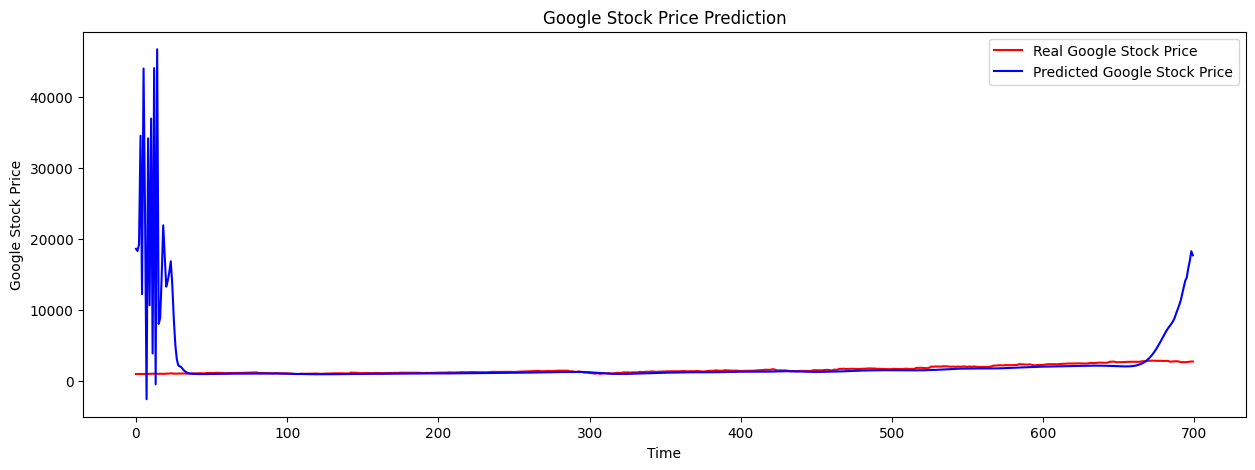

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
